# Stack Overflow Survey Analysis 2023

## 2. Survey Demographics
The goal of Chapter 2. Survey Demographics is to deepen the understanding of the main dataset, the survey results. By understanding the type of people that answer the survey it will help to put context to the insights that have been created from the analysis.

### Import Packages and Load Data

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load settings
pd.set_option('display.max_columns', None)

# load data
data =  pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Stack Overflow Survey Analysis/Stack-Overflow-Survey-Analysis-2023/data for chapters/data.csv')

### Create Functions

#### Plot Data
- Pie Graph
- Histogram

In [4]:
# pie graph creation 
def pie_graph(df,column):
    # get the value counts index and values for the pie chart
    category = df[column].value_counts().index
    values = df[column].value_counts().values

    # display the pie chart
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=category,autopct='%1.1f%%')
    plt.title(f'Distribution of {column} in Data')
    plt.axis('equal')
    plt.show()

In [5]:
def plot_histogram(data, bins, title, xlabel, ylabel, color='blue', grid=True):

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.show()

In [6]:
# create a bar chart that allows for rotation of x axis
def plot_bar(xdata, ydata, title,xlabel,ylabel,rotation):
    plt.figure(figsize=(10,6))
    plt.bar(xdata,ydata)
    plt.xticks(rotation=rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### Exploratory Data Analysis on Demographics
By performing a brief EDA on the columns which are considered demographics, it will help contextualise the findings from the analysis.
- Age: What is your current age range
- MainBranch: What is your current role
- EdLevel: What is your current education level
- Country: What country do you currently reside in

#### Age Analysis

In [19]:
# get the value counts for 'Age' column
age_counts = data['Age'].value_counts()
age_counts

25-34 years old       32964
35-44 years old       20315
18-24 years old       17673
45-54 years old        8210
Under 18 years old     4030
55-64 years old        3328
65 years or older      1131
Prefer not to say       330
Name: Age, dtype: int64

In [20]:
# as the data is ordinal reindex the value counts
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# reindex the series to match 'age_order'
age_demographic = age_counts.reindex(age_order)

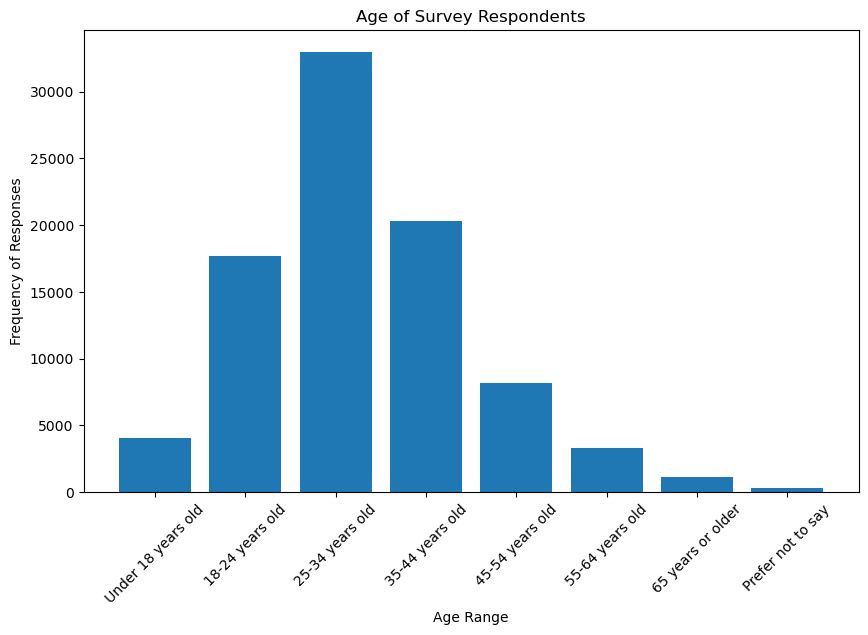

In [22]:
# using the definition create a bar chart
plot_bar(age_demographic.index,age_demographic.values,'Age of Survey Respondents','Age Range', 'Frequency of Responses',45)

Age is normally distributed across the age ranges with a mean of 25-34 years old as the most common response. This suggests that the Stack Overflow Survey is answered by those who are in their years of working as the majority of respondents fall between 18 and 54.

#### Use of Code

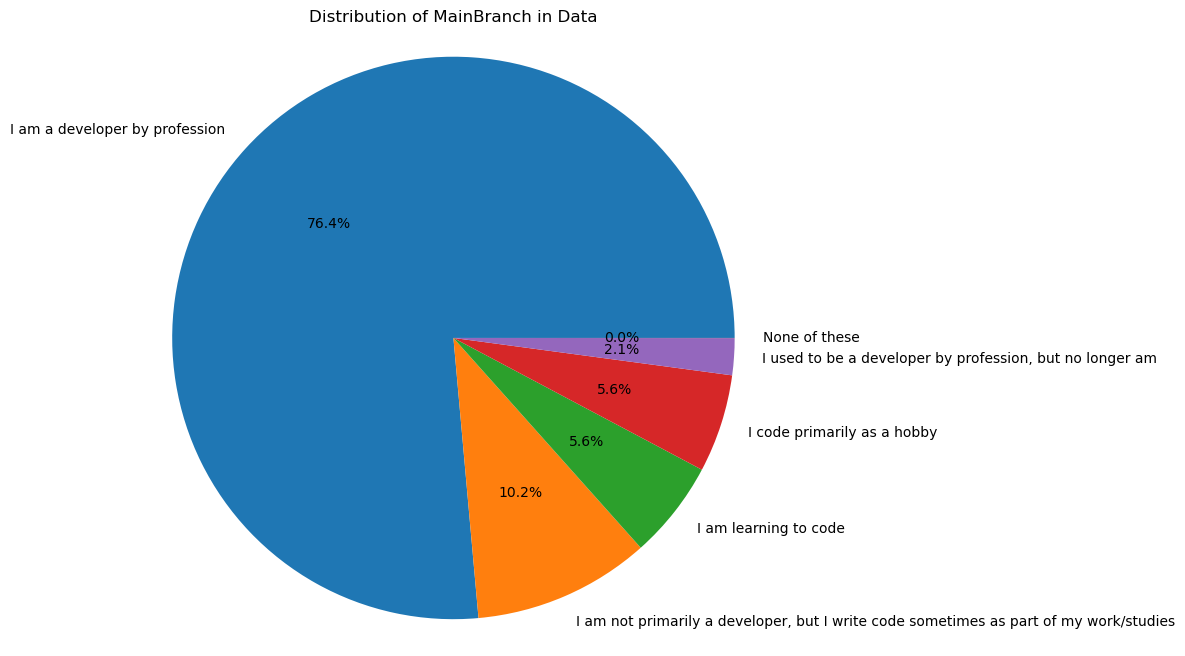

In [23]:
# create a pie chart which describes the distribution of reasons for coding
pie_graph(data,'MainBranch')

The majority of respondents are professionals who earn money for their skills in code. Conveying that the Stack Overflow is a community of experienced individuals who help one another through online forums, this is discussed further in the report.

### Education Level

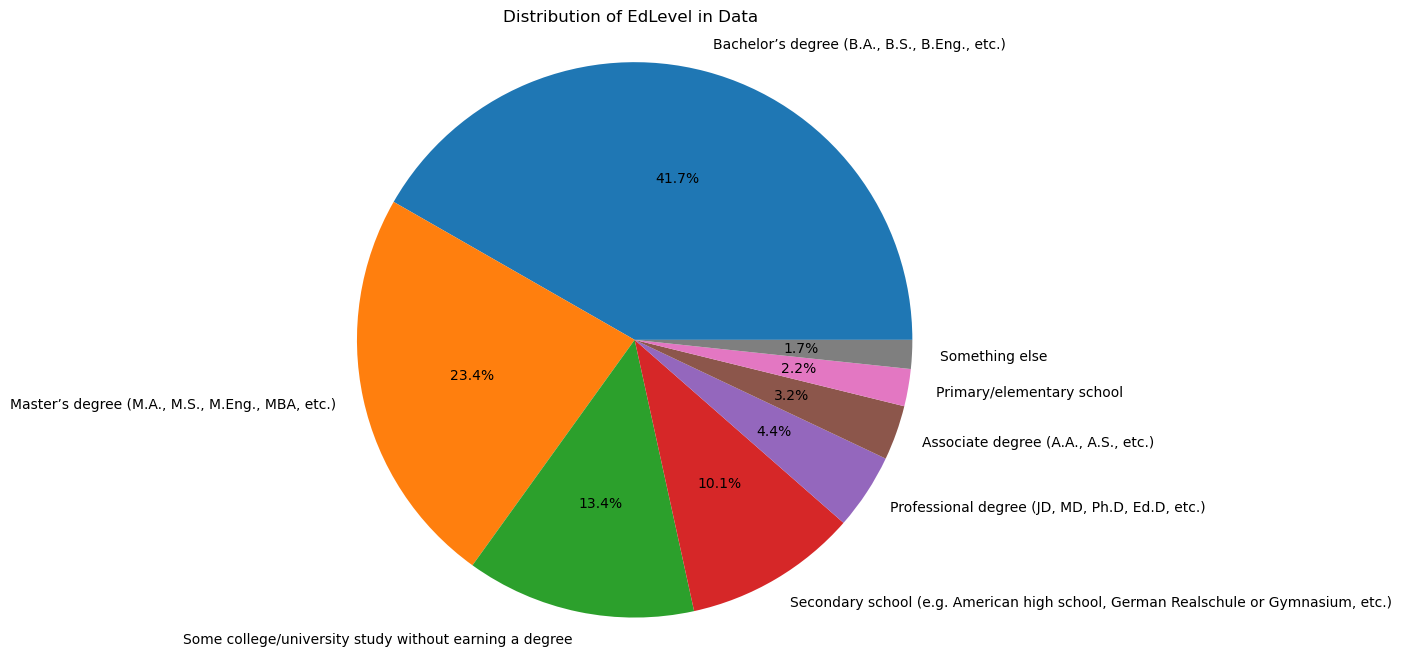

In [24]:
# create a pie chart for the level of education respondents have achieved
pie_graph(data,'EdLevel')

About 2/3 of respondents have atleast a bachelors degree, this is obviously a very high value in comparison to global numbers. This suggests that the data is going to be skewed to those who are financially invested in harnessing a career to do with data/code.

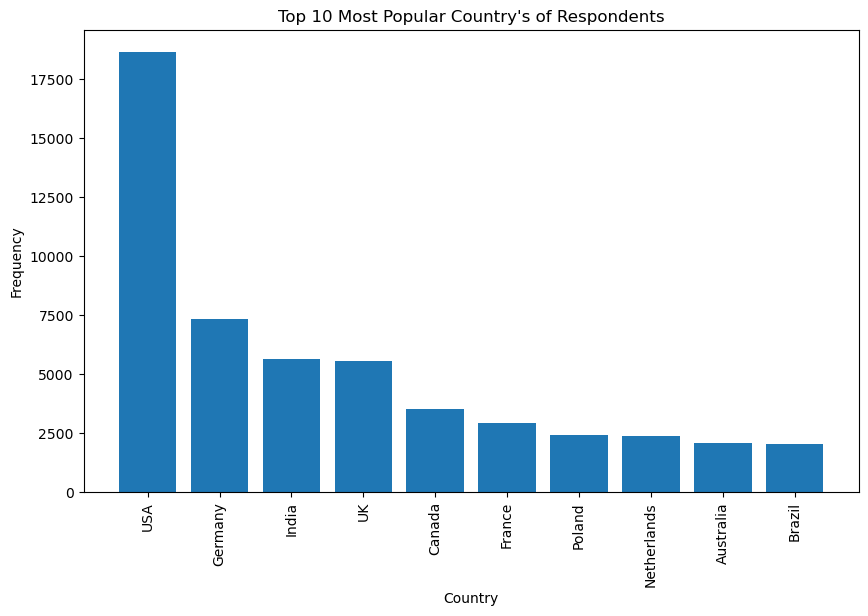

In [25]:
# get the y values of the top 10 countries
country_respondents = data['Country'].value_counts().head(10)

# because the length of the UK is so long it is going to be renamed
country_respondents.index = ['USA','Germany','India','UK','Canada','France','Poland','Netherlands','Australia','Brazil']

# plot the data
plot_bar(country_respondents.index,country_respondents.values,"Top 10 Most Popular Country's of Respondents",'Country','Frequency',90)

The majority of respondents are in the US. The rest of the countries belong mainly to Europe however Brazil, Australia, India and Canada are also in there responses.

The typical respondent is a professional individual that lives in a developed country who has had years of education